In [1]:
import os
import pandas as pd

In [2]:
filePath = os.path.join(os.getcwd(), 'hindi_corpus_2012_12_19', 'Hi_Newspapers.txt')
data = pd.read_csv(filePath, delimiter='\t', names=['source', 'date', 'unnamed_1', 'unnamed_2', 'text'])

In [3]:
filePath2 = os.path.join(os.getcwd(), 'hindi_corpus_2012_12_19', 'Hi_Blogs.txt')
data2 = pd.read_csv(filePath2, delimiter='\t', names=['source', 'date', 'unnamed_1', 'unnamed_2', 'text'])

In [ ]:
data.loc[:,['source', 'date', 'text']]

In [ ]:
data2.loc[:,['source', 'date', 'text']]

In [ ]:
data3.loc[:,['source', 'date', 'text']]

In [ ]:
sample = data.text.loc[1]

In [ ]:
sample.strip()

In [ ]:
from textGenerator import TextProcess
textProcessor = TextProcess()

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    return rem_url

In [ ]:
preprocess(sample)

In [ ]:
from textGenerator import TextGenerator
textgen = TextGenerator()
sample = textgen.getRandomText()
sample

In [ ]:
temp = sample


In [ ]:
sample = temp
preprocess(sample)
# print(f"Sample : {sample}")
sample = sample.strip()
# print(f"Sample : {sample}")
sample = sample.splitlines()
print(f"Sample : {sample}")
sample = sample[0]
sample = sample.split()
print(f"Sample : {sample}")

In [ ]:
def isEndOfLine(x):
    if u'\u0964' <= x <= u'\u0965' :
        return True
    return False
    

def isMatra(x):
    if (u'\u0901' <= x <= u'\u0903' or 
        u'\u093C' <= x <= u'\u094F' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0962' <= x <= u'\u0963'):
        return True
    return False
def isVowel(x):
    if (u'\u0905' <= x <= u'\u0914' or 
        u'\u0960' <= x <= u'\u0961'):
        return True
    return False
def isConsonant(x):
    if (u'\u0915' <= x <= u'\u0939' or 
        u'\u0958' <= x <= u'\u095F'):
        return True
    return False

def isOM(x):
    if x == u'\u0950' :
        return True
    return False
    
    

In [ ]:
pd1 =data.text
pd2 =data2.text
new_sample = pd.concat([pd1, pd2], ignore_index=True)

new_sample.head()


In [ ]:
vowel=0
consonant=0
matra=0
eofLine=0
OM=0
vowel_matra=0
half_vowel=0
consonant_matra=0
constant_half_matra=0;
word_start_matra=0
half_consonant_vowel=0
half_consonant_matra=0
dictionary_vowel = {}
dictionary_consonant = {} 
words_with_half_consonant_following_vowel={}
words_with_half_consonant_following_matra={}
words_with_vowels_following_matra={}
constant_and_vowel_combination={}
words_starting_with_matra = []
words_having_half_vowel=[]

wordCount = 0
for para in new_sample:
    words = para.split()
    for word in words:
        characters = list(word)
        wordCount += 1
#         if(isMatra(characters[0])):
#             word_start_matra+=1
        for index, char in enumerate(characters):
            if(isMatra(char)):
                matra = matra+1
                if(index==0):
                    word_start_matra += 1
                    words_starting_with_matra.append(word)
                
            elif(isVowel(char)):
                if(index+1 < len(characters)):
                    if(isMatra(characters[index+1])):
                        vowel_matra=vowel_matra+1
                        if word in words_with_vowels_following_matra: 
                            words_with_vowels_following_matra[word] += 1
                        else: 
                            words_with_vowels_following_matra.update({word: 1}) 
                        
                    if(characters[index+1] == u'\u094D'):
                        half_vowel+=1
                        words_having_half_vowel.append(word)
                if char in dictionary_vowel: 
                    dictionary_vowel[char] += 1
                else: 
                    dictionary_vowel.update({char: 1}) 
                vowel=vowel+1
            elif(isConsonant(char)):
                if(index+1 < len(characters)):
                    if(isMatra(characters[index+1])):
                        consonant_matra=consonant_matra+1
                    if(index+2 < len(characters)):   
                        if(characters[index+1] == u'\u094D'):
                            if(isVowel(characters[index+2])):
                                half_consonant_vowel+=1
                                if word in words_with_half_consonant_following_vowel: 
                                    words_with_half_consonant_following_vowel[word] += 1
                                else: 
                                    words_with_half_consonant_following_vowel.update({word: 1}) 
                            if(isMatra(characters[index+2])):
                                half_consonant_matra+=1
                                if word in words_with_half_consonant_following_matra: 
                                    words_with_half_consonant_following_matra[word] += 1
                                else: 
                                    words_with_half_consonant_following_matra.update({word: 1})
                if char in dictionary_consonant: 
                    dictionary_consonant[char] += 1
                else: 
                    dictionary_consonant.update({char: 1}) 
                
                consonant = consonant+1
            elif(isEndOfLine(char)):
                eofLine = eofLine+1
            elif(isOM(char)):
                OM = OM+1

In [ ]:
print(f"Matra : {matra}")
print(f"Vowel : {vowel}")
print(f"Consonant : {consonant}")
print(f"end of line : {eofLine}")
print(f"OM : {OM}")
print(f"Word starting with a Matra : {word_start_matra}")
print(f"Vowels followed by a matra : {vowel_matra}")
print(f"Consonant followed by a matra : {consonant_matra}")
print(f"half vowel : {half_vowel}")
print(f"Number of words : {wordCount}")
print(f"half cononants followed by a matra : {half_consonant_matra}")
print(f"half cononants followed by a Vowel: {half_consonant_vowel}")
print(f"Words having half vowel: {words_having_half_vowel}")
print(f"Words starting with a matra : {words_starting_with_matra}")
print(f"Words with vowels followed by a matra : {words_with_vowels_following_matra}")


In [ ]:
for allKeys in dictionary_vowel: 
    print(f"Frequency of {allKeys} : {dictionary_vowel[allKeys]}")

In [ ]:
for allKeys in dictionary_consonant: 
    print(f"Frequency of {allKeys} : {dictionary_consonant[allKeys]}")

In [ ]:
for allKeys in words_with_half_consonant_following_vowel: 
    print(f"{allKeys} : {words_with_half_consonant_following_vowel[allKeys]}")

In [ ]:
for allKeys in words_with_half_consonant_following_matra: 
    print(f" {allKeys} : {words_with_half_consonant_following_matra[allKeys]}")

In [ ]:
def isValidWord():
    pass

In [ ]:
def isEndOfLine(x):
    if u'\u0964' <= x <= u'\u0965' :
        return True
    return False
    

def isMatra(x):
    if (u'\u0901' <= x <= u'\u0903' or 
        u'\u093C' <= x <= u'\u094F' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0962' <= x <= u'\u0963'):
        return True
    return False
def isVowel(x):
    if (u'\u0905' <= x <= u'\u0914' or 
        u'\u0960' <= x <= u'\u0961'):
        return True
    return False
def isConsonant(x):
    if (u'\u0915' <= x <= u'\u0939' or 
        u'\u0958' <= x <= u'\u095F'):
        return True
    return False

def isOM(x):
    if x == u'\u0950' :
        return True
    return False
    
    

In [ ]:
sample = 'येदयुरप्पा, उनके बेटे और सांसद बी वाई राघवेन्द्र, बी वाई विजयेन्द्र, दामाद आर एन सोहन कुमार कोर्ट में मौजूद थे। कोर्ट ने 16 नवंबर को इन्हें मौजूद होने के लिए समन जारी किया था। अदालत ने यह भी कहा कि मामले में जांच खत्म हो चुकी है।'
sample.split()[7]

In [6]:
detectChars = {}

def detectCharsFunc(word):
    chars = list(word) 
    a = ''
    enum_iter = enumerate(chars)
    flag = 0
    for index, char in enum_iter:
         if(isVowel(char) or isConsonant(char)):
            flag=0
            if a is not '':
                if a in detectChars: 
                    detectChars[a] += 1
                else: 
                    detectChars.update({a: 1})
            a = char
        elif(isMatra(char)):
            a += char
            if char==u'\u094D':
                flag += 1
                if flag>1:
                    flag = 0
                    while (index+1 < len(chars) and  isMatra(chars[index+1])):
                        index, char = next(enum_iter)
                        a += char
                    if a in detectChars: 
                        detectChars[a] += 1
                    else: 
                        detectChars.update({a: 1})
                    a = ''
                    continue

                if (index+1 >= len(chars)):
                    continue
                index, char = next(enum_iter)
                a += char
            else:
                flag = 0
    if a in detectChars: 
        detectChars[a] += 1
    else: 
        detectChars.update({a: 1})    
detectCharsFunc(word)
detectChars


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [7]:
for para in new_sample:
    words = para.split()
    for word in words:
        detectCharsFunc(word)

NameError: name 'new_sample' is not defined

In [8]:
detectChars
    

NameError: name 'detectChars' is not defined

In [9]:
detectConsonants_Matra={}
def detectConsonantMatra(word):
    chars = list(word) 
#     print(f'chars:{chars}')
    a = ''
    enum_iter = enumerate(chars)
    flag = 0
    for index, char in enum_iter:
        a =''
        if(isConsonant(char)):
            a+=char
            i=0;
            while (index+1 < len(chars) and  isMatra(chars[index+1])):
                index, char = next(enum_iter)
                a += char
                i+=1
            if a in detectConsonants_Matra: 
                continue
            elif(i!=0): 
                detectConsonants_Matra.update({a: i})
            



In [10]:
for para in new_sample:
    words = para.split()
    for word in words:
        detectConsonantMatra(word)

NameError: name 'new_sample' is not defined

In [11]:
detectConsonants_Matra

{}

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
sns.set(font="Meiryo")

In [338]:
df1.to_csv('vowel_freq.csv')

In [339]:
Data1 = pd.read_csv(r"/Users/shivanitripathi/Documents/study material/DS/OLAM/datagen/vowel_freq.csv")

In [340]:
Data1.index
Data1



,Unnamed: 0,Frequency
0,अ,429904
1,औ,205808
2,ऐ,34538
3,उ,304315
4,ए,410350
5,इ,294766
6,आ,337944
7,ई,187285
8,ऊ,14706
9,ओ,62414


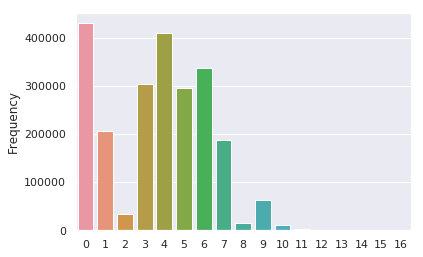

In [341]:
sns.barplot(y='Frequency',x=Data1.index,data=Data1.iloc[0:750,:])

In [348]:
df2=pd.DataFrame.from_dict(dictionary_consonant, orient='index',columns=[ 'Frequency'])
print(df2.index)
df2.to_csv('consonant_freq.csv',index = True)
Data2 = pd.read_csv(r"/Users/shivanitripathi/Documents/study material/DS/OLAM/datagen/consonant_freq.csv")
Data2



Index(['प', 'र', 'व', 'क', 'स', 'त', 'न', 'म', 'ह', 'य', 'द', 'ख', 'ल', 'ड़',
       'ब', 'भ', 'च', 'श', 'ट', 'ड', 'ग', 'ज', 'थ', 'छ', 'फ', 'घ', 'झ', 'ध',
       'ढ', 'ण', 'ठ', 'ष', 'ढ़', 'ऩ', 'ञ', 'ङ', 'य़', 'ळ', 'क़', 'ग़', 'ख़', 'ज़',
       'ऱ', 'फ़'],
      dtype='object')


,Consonants,Frequency
0,प,1254359
1,र,3336110
2,व,973866
3,क,3623226
4,स,2110400
5,त,1768862
6,न,2238889
7,म,1736874
8,ह,2146189
9,य,1207779


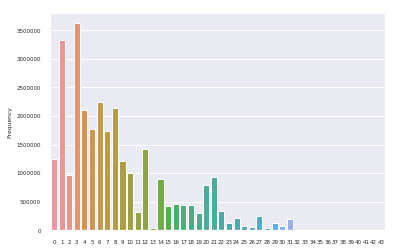

In [351]:
sns.set(font="Meiryo",font_scale=0.5)
sns.barplot(y='Frequency',x=Data2.index,data=Data2.iloc[0:1500,:])

In [357]:
df3=pd.DataFrame.from_dict(words_with_half_consonant_following_vowel, orient='index',columns=[ 'Frequency'])
print(df3.index)
df3=df3.sort_values(by=['Frequency'],ascending=False)
df3.to_csv('half_cononant_vowel.csv',index = True)


Index(['मेंच्अच्छा', 'डिस्ऑर्डर', 'हुर्ई।', 'च्ए', 'गर्इं।', 'हुर्इं',
       'र्इंट,', '‘र्इंटें’,', 'कार्रवार्ई', 'प्रतिच्अच्छी',
       ...
       'रेलवे-लार्इन', 'स्थार्इ', 'एफडीआर्इ', 'कलार्इ', 'सद्उपदेश,', 'र्इंटें',
       'बिलसपुरहिन-’’अइसर्इ', 'जबरर्इ', 'गर्इ?', 'सफार्इ'],
      dtype='object', length=212)


In [362]:
Data3 = pd.read_csv(r"/Users/shivanitripathi/Documents/study material/DS/OLAM/datagen/half_cononant_vowel.csv")
Data3=Data3[0:20]
Data3

,Words,Frequency
0,कोर्इ,42
1,गर्इ,26
2,डिस्ऑर्डर,23
3,गर्इ।,22
4,गर्इं।,21
5,हुर्इ,20
6,कर्इ,13
7,गर्इं,8
8,हुर्इ।,8
9,दिखार्इ,8


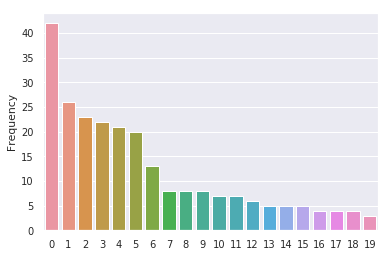

In [363]:
sns.set(font="Meiryo",font_scale=0.9)
sns.barplot(y='Frequency',x=Data3.index,data=Data3.iloc[0:1500,:])

In [372]:
df4=pd.DataFrame.from_dict(words_with_half_consonant_following_matra, orient='index',columns=[ 'Frequency'])
print(df4.index)
df4=df4.sort_values(by=['Frequency'],ascending=False)
df4.to_csv('half_cononant_matra.csv',index = True)


Index(['जलर्ापूत्ति', 'वष्ाीüय', 'सुसज्ज्ाित', 'मुट््ठीभर', 'केन््रद',
       'पुरूष्ाों', 'पाष्ाüद', 'मुद््दों', 'क्िलंटन', 'कट््टे',
       ...
       'छ्ःओटी', 'प्रा्रोत्ेत्साहित', 'पालन-पोष्ाण', '(ब्ा्रह्म)', 'विध्ेयक',
       'कलारूप्ा', 'मैंट्ो', 'राष्ट्र्ीय', 'एफटर््स', 'ज़्पारोशिया'],
      dtype='object', length=476)


In [373]:
Data4 = pd.read_csv(r"/Users/shivanitripathi/Documents/study material/DS/OLAM/datagen/half_cononant_matra.csv")
Data4=Data4[0:20]
Data4

,Words,Frequency
0,वष्ाü,20
1,निदर्ेशक,20
2,परिष्ाद,14
3,वक़्त,14
4,मिट््टी,13
5,कृçष्ा,11
6,वष्ाीüय,11
7,जलर्ापूत्ति,10
8,मुद््दा,10
9,कार्यकत्तर्ााओं,10


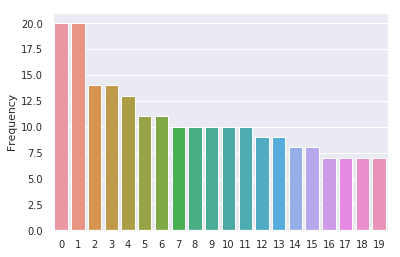

In [374]:
sns.set(font="Meiryo",font_scale=0.9)
sns.barplot(y='Frequency',x=Data4.index,data=Data4.iloc[0:1500,:])

In [376]:
df5=pd.DataFrame.from_dict(detectChars, orient='index',columns=[ 'Frequency'])
print(df5.index)
df5=df5.sort_values(by=['Frequency'],ascending=False)
Data5 = pd.read_csv(r"/Users/shivanitripathi/Documents/study material/DS/OLAM/datagen/detectChars.csv")
Data5=Data5[0:20]
Data5

Index(['का', 'पू', 'र्व', 'पा', 'कि', 'स्ता', 'नी', 'क', 'प्ता', 'न',
       ...
       'ट्.', 'दे्व', 'निंं', 'र्पः', 'ठ्या', 'ह्लो', 'च्चोे', 'त्न्', 'त्साा',
       'ड़्ड'],
      dtype='object', length=8491)


,Characters,Frequency
0,र,1678224
1,क,1004802
2,न,861356
3,स,817892
4,प,632892
5,के,607038
6,ह,536967
7,ने,525971
8,ल,523101
9,त,516523


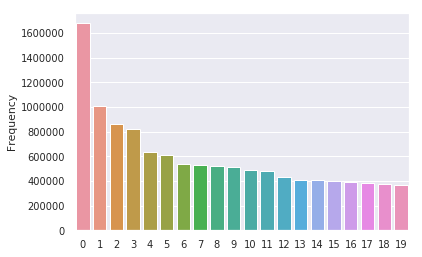

In [377]:
sns.set(font="Meiryo",font_scale=0.9)
sns.barplot(y='Frequency',x=Data5.index,data=Data5.iloc[0:1500,:])

In [379]:
df6=pd.DataFrame.from_dict(detectConsonants_Matra, orient='index',columns=[ 'Frequency'])
print(df6.index)
df6=df6.sort_values(by=['Frequency'],ascending=False)
Data6 = pd.read_csv(r"/Users/shivanitripathi/Documents/study material/DS/OLAM/datagen/detectConsonants_Matra.csv")
Data6=Data6[0:20]
Data6

Index(['पू', 'र्', 'पा', 'कि', 'स्', 'ता', 'नी', 'प्', 'ने', 'हा',
       ...
       'झाा', 'पँू', 'विँ', 'ठिि', 'बंे', 'हाँं', 'नुे', 'किृ', 'ळौ', 'निंं'],
      dtype='object', length=2957)


,Characters,Frequency
0,मेंंंंंं,7
1,छेेेेेे,6
2,कोेेेे,5
3,कााेंं,5
4,खेेंं,4
5,यांें,4
6,ड़ी़ी,4
7,ज़्ाु,4
8,टेेंं,4
9,ग़्ाू,4


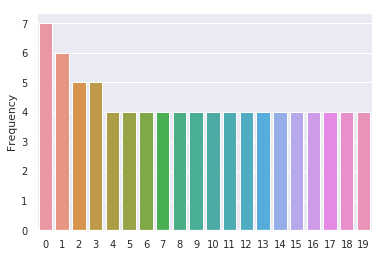

In [380]:
sns.set(font="Meiryo",font_scale=0.9)
sns.barplot(y='Frequency',x=Data6.index,data=Data6.iloc[0:1500,:])

In [14]:
encoder_dict= {
    "ऀ":"0",
    "ँ":"1",
    "ं":"2",
    "ः":"3",
    "ऄ":"4",
    "अ":"5",
    "आ":"6",
    "इ":"7",
    "ई":"8",
    "उ":"9",
    "ऊ":"10",
    "ऋ":"11",
    "ऌ":"12",
    "ऍ":"13",
    "ऎ":"14",
    "ए":"15",
    "ऐ":"16",
    "ऑ":"17",
    "ऒ":"18",
    "ओ":"19",
    "औ":"20",
    "क":"21",
    "ख":"22",
    "ग":"23",
    "घ":"24",
    "ङ":"25",
    "च":"26",
    "छ":"27",
    "ज":"28",
    "झ":"29",
    "ञ":"30",
    "ट":"31",
    "ठ":"32",
    "ड":"33",
    "ढ":"34",
    "ण":"35",
    "त":"36",
    "थ":"37",
    "द":"38",
    "ध":"39",
    "न":"40",
    "ऩ":"41",
    "प":"42",
    "फ":"43",
    "ब":"44",
    "भ":"45",
    "म":"46",
    "य":"47",
    "र":"48",
    "ऱ":"49",
    "ल":"50",
    "ळ":"51",
    "ऴ":"52",
    "व":"53",
    "श":"54",
    "ष":"55",
    "स":"56",
    "ा":"57",
    "ि":"58",
    "ी":"59",
    "ु":"60",
    "ू":"61",
    "ृ":"62",
    "ॄ":"63",
    "ॆ":"64",
    "े":"65",
    "ै":"66",
    "ॉ":"67",
    "ॊ":"68",
    "ो":"69",
    "ौ":"70",
    "्":"71",
    "ॎ":"72",
    "ॐ":"73",
    "ॏ":"74",
    "।":"75",
    "॥":"76",
    "०":"77",
    "१":"78",
    "२":"79",
    "३":"80",
    "४":"81",
    "५":"82",
    "६":"83",
    "७":"84",
    "८":"85",
    "९":"86",
    "ॕ":"87",
    "ॖ":"88",
    "ॗ":"89",
    "॰":"90",
    "ॱ":"91",
    "ॲ":"92",
    "ॳ":"93",
    "ॴ":"94",
    "ॵ":"95",
    "ॶ":"96",
    "ॷ":"97",
    "ॸ":"98",
    "ॹ":"99",
    "ॺ":"100",
    "ॻ":"101",
    "ॼ":"102",
    "ॽ":"103",
    "ॾ":"104",
    "ॿ":"105",
    "क़":"106",
    "ख़":"107",
    "ग़":"108",
    "ज़":"109",
    "ड़":"110",
    "ढ़":"111",
    "फ़":"112",
    "य़":"113",
    "ॠ":"114",
    "ॡ":"115",
    "ॢ":"116",
    "ॣ":"117"
}

In [15]:

from textGenerator import TextGenerator
textGen = TextGenerator()
data = textGen.data['text']
print(data[0])

पूर्व पाकिस्तानी कप्तान अकरम ने कहा कि यदि खिलाड़ी दबाव भूलना भी चाहे तो दर्शक, क्रिकेट प्रेमी और मीडिया ऐसा नहीं करने देता है। उन्होंने कहा, ‘‘ लोग कहते हैं कि एशेज में बहुत दबाव होता है लेकिन भारत पाकिस्तान के मैचों में जितना दबाव होता उतना किसी अन्य के साथ खेलने में नहीं होता है। हर खिलाड़ी इन मैचों में अच्छा प्रदर्शन करना चाहता है। ’’
